---

Universidade Federal de Uberlândia

Faculdade de Engenharia Elétrica

Imagens Médicas 2

Discente: Levy Gabriel da S. G.

---

# Projeto final

O projeto final será dividido em duas seções principais. A primeira consiste no processamento de uma imagem contaminada com diversos tipos de ruídos e, estes deverão ser filtrados por diferentes filtros e no final serão comparados os resultados.

Na segunda e última seção serão comparados os efeitos de filtros no domínio da frequência e do espaço aplicados a diferentes imagens.

## Remoção de ruído

Nesta seção será utilizada uma imagem que será contaminada por 4 diferentes ruídos, estes são: ruído branco, ruído sal e pimenta, ruído Gaussiano e ruído exponencial. Para cada imagem ruidosa serão experimentados três diferentes filtros: filtro de média, filtro de mediana e um filtro passa-baixas Butterworth.

De início, carrega-se a imagem que será utilizada no processamento:

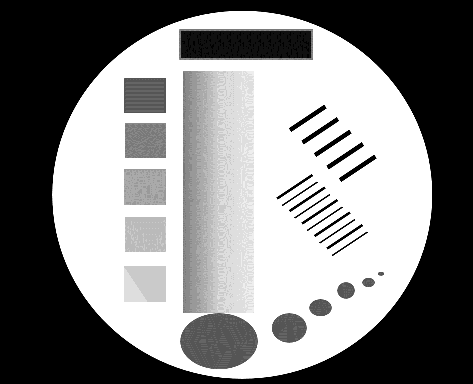

In [3]:
pkg load image
img = double(imread('imagem_projeto_item1.png'));
imshow(imresize(img,1/2))

### Contaminação da imagem por ruídos

Obtém-se as dimensões da imagem para que sejam criadas as máscaras de ruído que serão adicionadas à imagem original:

In [4]:
size_ = size(img)

size_ =

   767   945



O pacote de estatística também é carregado para que as distribuições de probabilidade sejam utilizadas para gerar o ruído:

In [5]:
pkg load statistics

Em seguida são definidas as máscaras de ruído. Primeiramente o ruído branco de característica constante, em seguida o ruído sal e pimenta, o ruído Gaussiano e, por fim, o ruído exponencial.

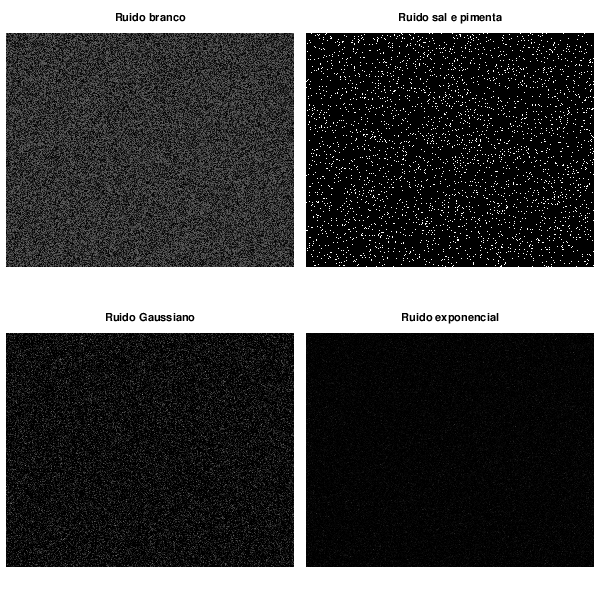

In [6]:
gap = 0.01;

% white noise
start_ = 0;
end_ = 100;
whiteNoise = unifrnd(start_, end_, size_);
h = subplot(2,2,1);
set(h,'Position', [0+gap .5 .5-2*gap .5])
imshow(uint8(whiteNoise));
title('Ruido branco');

% salt n' pepper noise
pepperThreshold = 0.05;
saltThreshold = 1-pepperThreshold;
saltnpepperNoise = rand(size_);
saltnpepperNoise(saltnpepperNoise <= pepperThreshold) = 0;
saltnpepperNoise(saltnpepperNoise >= saltThreshold) = 255;
h = subplot(2,2,2);
set(h,'Position', [.5+gap .5 .5-2*gap .5])
imshow(uint8(saltnpepperNoise));
title('Ruido sal e pimenta');

% Gaussian noise
mean = 5;
std = 30;
gaussianNoise = normrnd(mean, std, size_);
h = subplot(2,2,3);
set(h,'Position', [0+gap 0 .5-2*gap .5])
imshow(uint8(gaussianNoise));
title('Ruido Gaussiano');

% exponencial noise
mean = 5;
exponencialNoise = exprnd(mean, size_);
h = subplot(2,2,4);
set(h,'Position', [.5+gap 0 .5-2*gap .5])
imshow(uint8(exponencialNoise));
title('Ruido exponencial');

set(gcf,'Position',[0 0 600 600])


Por fim os ruídos são incoporados à imagem de interesse:

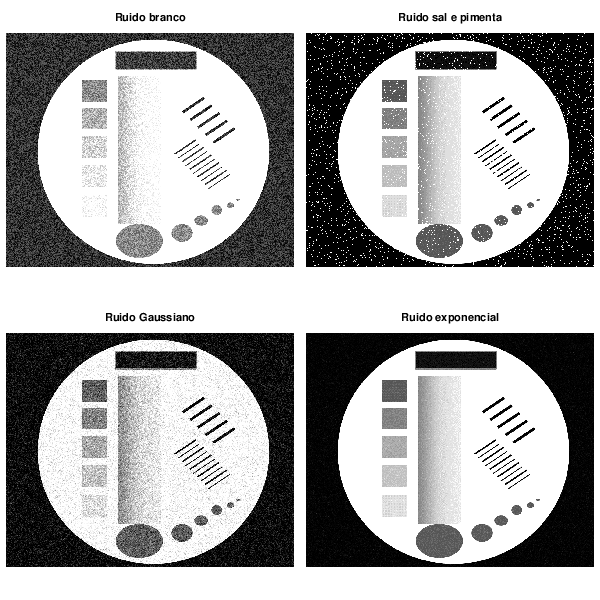

In [7]:
simulada_whiteNoise = img + whiteNoise;
simulada_saltnpepperNoise = img + saltnpepperNoise;
simulada_gaussianNoise = img + gaussianNoise;
simulada_exponencialNoise = img + exponencialNoise;

% white noise
h = subplot(2,2,1);
set(h,'Position', [0+gap .5 .5-2*gap .5])
imshow(uint8(simulada_whiteNoise));
title('Ruido branco');

% salt n' pepper noise
h = subplot(2,2,2);
set(h,'Position', [.5+gap .5 .5-2*gap .5])
imshow(uint8(simulada_saltnpepperNoise));
title('Ruido sal e pimenta');

% Gaussian noise
h = subplot(2,2,3);
set(h,'Position', [0+gap 0 .5-2*gap .5])
imshow(uint8(simulada_gaussianNoise));
title('Ruido Gaussiano');

% exponencial noise
h = subplot(2,2,4);
set(h,'Position', [.5+gap 0 .5-2*gap .5])
imshow(uint8(simulada_exponencialNoise));
title('Ruido exponencial');

set(gcf,'Position',[0 0 600 600])

### Inicialização dos filtros

Os filtros podem ser inicializados da seguinte maneira, para o filtro espacial de média será utilizado um *kernel* de dimensões 5x5:

In [8]:
size_ = [5,5];
meanFilter = ones(size_)/(size_(1)*size_(2))

meanFilter =

   0.040000   0.040000   0.040000   0.040000   0.040000
   0.040000   0.040000   0.040000   0.040000   0.040000
   0.040000   0.040000   0.040000   0.040000   0.040000
   0.040000   0.040000   0.040000   0.040000   0.040000
   0.040000   0.040000   0.040000   0.040000   0.040000



E o filtro Butterworth passa-baixas na frequênciade frequência de corte de 50 pixels e ordem 5:

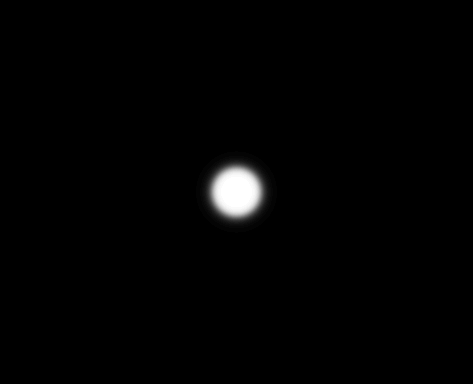

In [42]:
f_cutoff = 50;
order = 5;
[M,N] = size(img);
butterworthFilter = zeros(M,N);
cx = floor(M/2)+1;
cy = floor(N/2)+1;
for x= 1:M
    for y= 1:N
        D=sqrt(power((x-cx),2)+power((y-cy),2));
        butterworthFilter(x,y)=1/(1+power(D/f_cutoff,2*order));
    end
end
subplot(1,1,1);
imshow(imresize(butterworthFilter,1/2))

No caso do filtro de mediana, este, em si, não possui um *kernel*, portanto ele será aplicado diretamente na imagem por meio da função ```medfilt2```.

Por fim, os filtros são aplicados a cada uma das imagens ruidosas. Os resultados serão apresentados somente na próxima seção.

In [36]:
function filtered = freq_filt(img, filter)
    img_freq = fft2(img); % Fourier transform
    img_freq_cent = fftshift(img_freq); % image frequency spectrum centralized
    img_complex = ifftshift(img_freq_cent.*filter);
    filtered = real(ifft2(img_complex));
end

In [43]:
% applying mean filter
simulada_whiteNoise_mean       = imfilter(simulada_whiteNoise, meanFilter); 
simulada_saltnpepperNoise_mean = imfilter(simulada_saltnpepperNoise, meanFilter);
simulada_gaussianNoise_mean    = imfilter(simulada_gaussianNoise, meanFilter); 
simulada_exponencialNoise_mean = imfilter(simulada_exponencialNoise, meanFilter);

% applying butterworth filter
simulada_whiteNoise_butterworth       = freq_filt(simulada_whiteNoise, butterworthFilter); 
simulada_saltnpepperNoise_butterworth = freq_filt(simulada_saltnpepperNoise, butterworthFilter);
simulada_gaussianNoise_butterworth    = freq_filt(simulada_gaussianNoise, butterworthFilter); 
simulada_exponencialNoise_butterworth = freq_filt(simulada_exponencialNoise, butterworthFilter);

% applying median filter
simulada_whiteNoise_median       = medfilt2(simulada_whiteNoise); 
simulada_saltnpepperNoise_median = medfilt2(simulada_saltnpepperNoise);
simulada_gaussianNoise_median    = medfilt2(simulada_gaussianNoise); 
simulada_exponencialNoise_median = medfilt2(simulada_exponencialNoise);

### Resultados da remoção de ruído

In [45]:
function tripleImages(img1, img2, img3, str2, str3)
    gap = 0.01;
    
    h = subplot(1,3,1);
    set(h,'Position', [0+gap 0 1/3-2*gap 1])
    imshow(uint8(img1));
    title('Imagem original');

    h = subplot(1,3,2);
    set(h,'Position', [1/3+gap 0 1/3-2*gap 1])
    imshow(uint8(img2));
    title(str2);

    h = subplot(1,3,3);
    set(h,'Position', [2/3+gap 0 1/3-2*gap 1])
    imshow(uint8(img3));
    title(str3);


    set(gcf,'Position',[0 0 900 300])
end

#### Filtro de média

Nesta subseção serão analisados os resultados para o filtro de média.

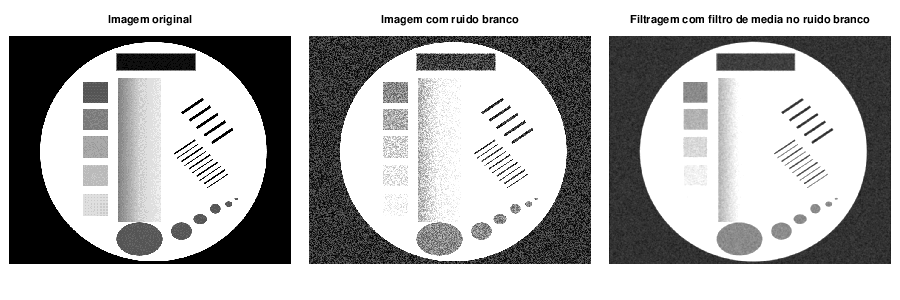

In [46]:
tripleImages(img, simulada_whiteNoise, simulada_whiteNoise_mean, ...
            'Imagem com ruido branco', ...
            'Filtragem com filtro de media no ruido branco');

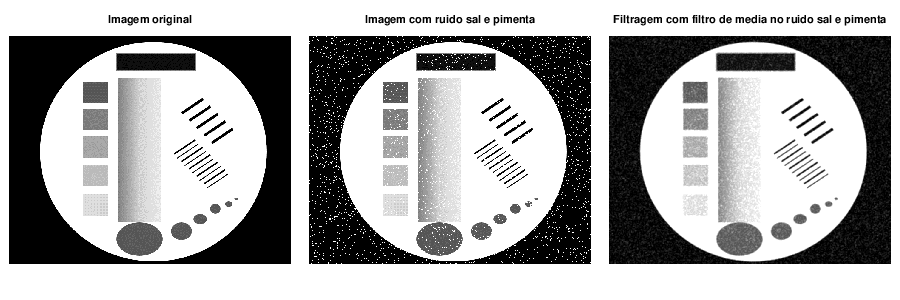

In [47]:
tripleImages(img, simulada_saltnpepperNoise, simulada_saltnpepperNoise_mean, ...
            'Imagem com ruido sal e pimenta', ...
            'Filtragem com filtro de media no ruido sal e pimenta');

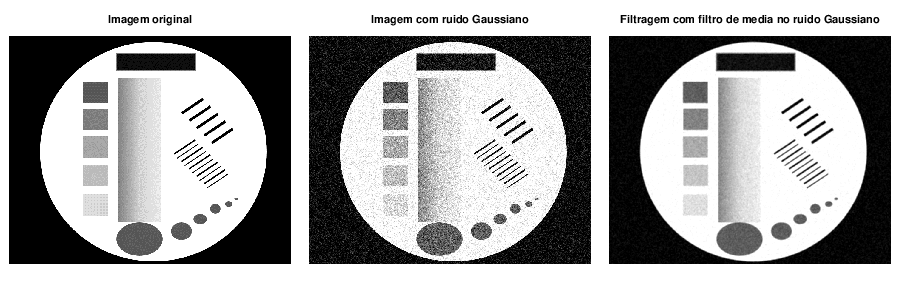

In [48]:
tripleImages(img, simulada_gaussianNoise, simulada_gaussianNoise_mean, ...
            'Imagem com ruido Gaussiano', ...
            'Filtragem com filtro de media no ruido Gaussiano');

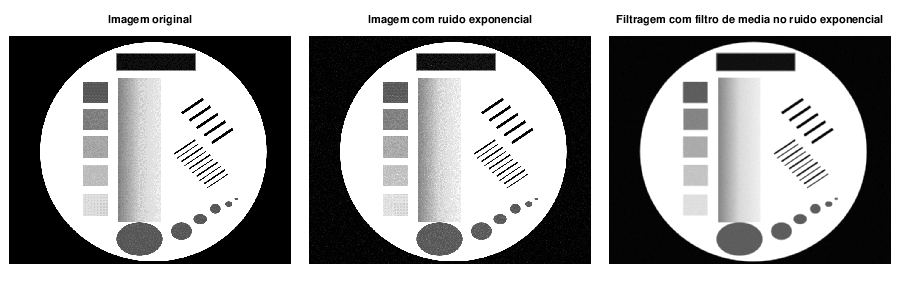

In [49]:
tripleImages(img, simulada_exponencialNoise, simulada_exponencialNoise_mean, ...
            'Imagem com ruido exponencial', ...
            'Filtragem com filtro de media no ruido exponencial');

Dos resultados com o filtro de média 5x5, observa-se o melhor resultado ao lidar com o ruído exponencial, que foi capaz de remover até os ruídos presentes na imagem original, porém restando pouca distorção em objetos menores. 

Em relação ao ruído Gaussiano e branco, o filtro foi capaz de restaurar a imagem à sua condição original. No caso do ruído branco, apesar da imagem estar altamente contaminada, fazendo com que o fundo preto assuma tons de cinza, o filtro foi capaz de proporcionar o borramento necessário para eliminar o ruído de alta frequência, porém sem restaurar a cor original.

Por fim, em relação ao ruído sal e pimenta, o filtro não se mostrou tão eficaz e fez com que o ruído se espalhasse mais pela imagem devido ao borramento.

#### Filtro Butterworth passa-baixas

Nesta subseção serão analisados os resultados para o filtro Butterworth passa-baixas.

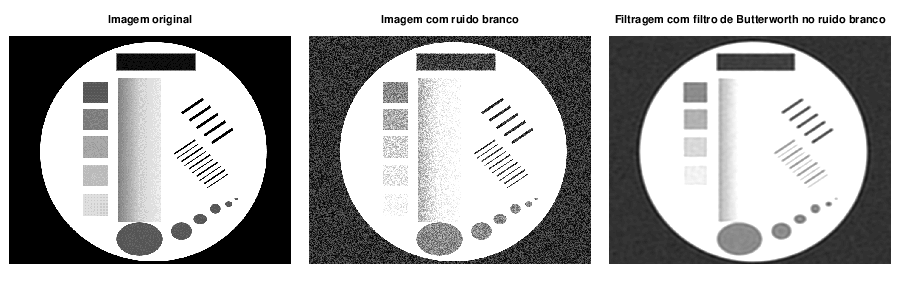

In [50]:
tripleImages(img, simulada_whiteNoise, simulada_whiteNoise_butterworth, ...
            'Imagem com ruido branco', ...
            'Filtragem com filtro de Butterworth no ruido branco');

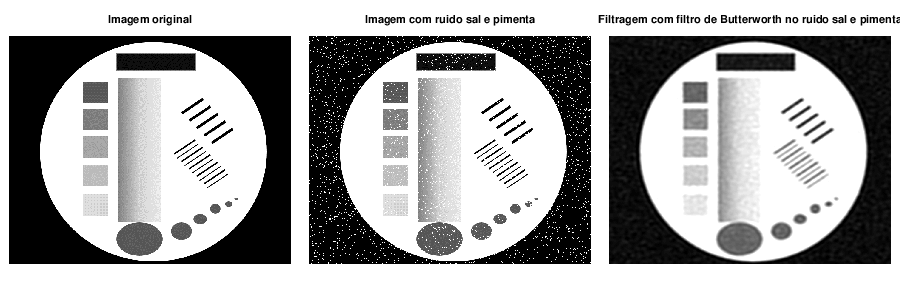

In [52]:
tripleImages(img, simulada_saltnpepperNoise, simulada_saltnpepperNoise_butterworth, ...
            'Imagem com ruido sal e pimenta', ...
            'Filtragem com filtro de Butterworth no ruido sal e pimenta');

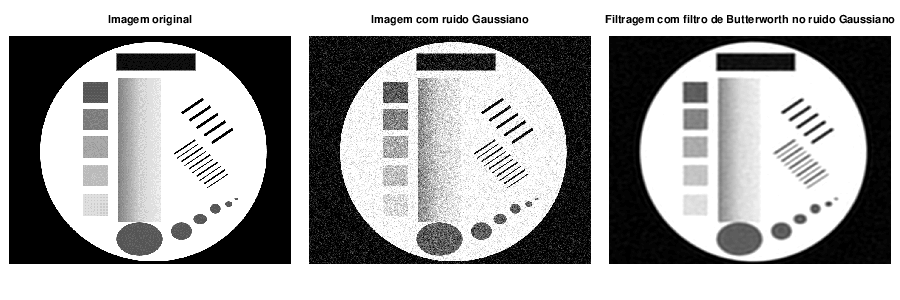

In [53]:
tripleImages(img, simulada_gaussianNoise, simulada_gaussianNoise_butterworth, ...
            'Imagem com ruido Gaussiano', ...
            'Filtragem com filtro de Butterworth no ruido Gaussiano');

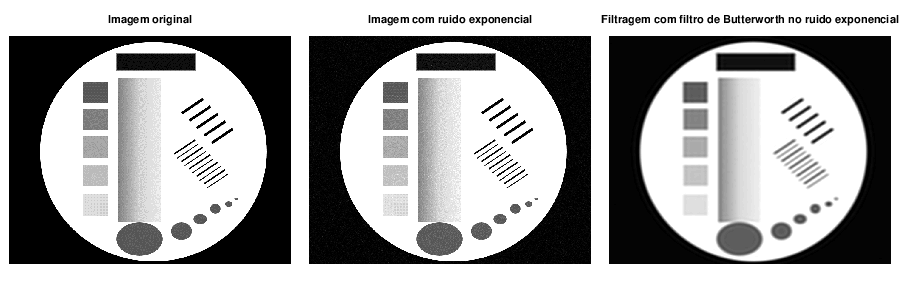

In [54]:
tripleImages(img, simulada_exponencialNoise, simulada_exponencialNoise_butterworth, ...
            'Imagem com ruido exponencial', ...
            'Filtragem com filtro de Butterworth no ruido exponencial');

Assim como para o filtro anterior, o filtro Butterworth se mostrou bastante eficaz em relação ao ruído exponencial. No ruído Gaussiano a sua performance foi um pouco degradada, considerando que seu resultado na transição entre branco e cinza apresenta-se um pouco ruidoso, mas no geral apresenta um bom borramento que eliminou maior parte do ruído.

Em relação ao ruído branco, este também possui comportamento semelhante ao filtro de média, porém seu borramento foi ainda maior e apresenta um leve efeito de *ringing* na transição abruta entre branco e preto.

Por fim, em relação ao ruído sal e pimenta, o filtro Butterworth apesar de não possuir grande eficácia, esse ainda se mostrou melhor que o filtro de média, lidando melhor com a eliminação do ruído com o borramento, porém não suficiente.

#### Filtro de mediana

Nesta subseção serão analisados os resultados para o filtro de mediana

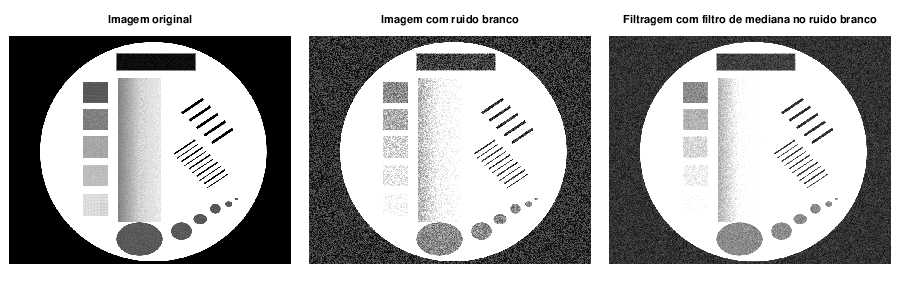

In [55]:
tripleImages(img, simulada_whiteNoise, simulada_whiteNoise_median, ...
            'Imagem com ruido branco', ...
            'Filtragem com filtro de mediana no ruido branco');

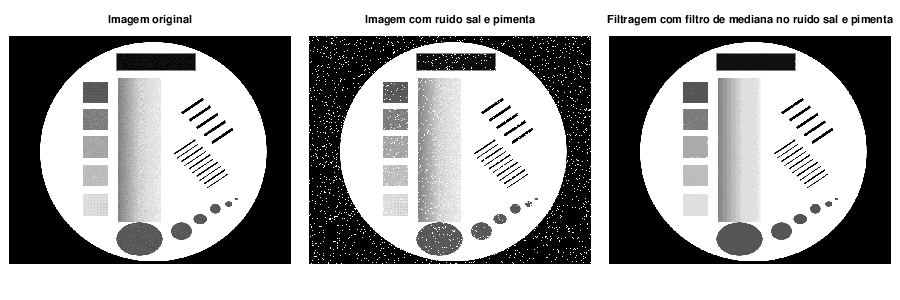

In [56]:
tripleImages(img, simulada_saltnpepperNoise, simulada_saltnpepperNoise_median, ...
            'Imagem com ruido sal e pimenta', ...
            'Filtragem com filtro de mediana no ruido sal e pimenta');

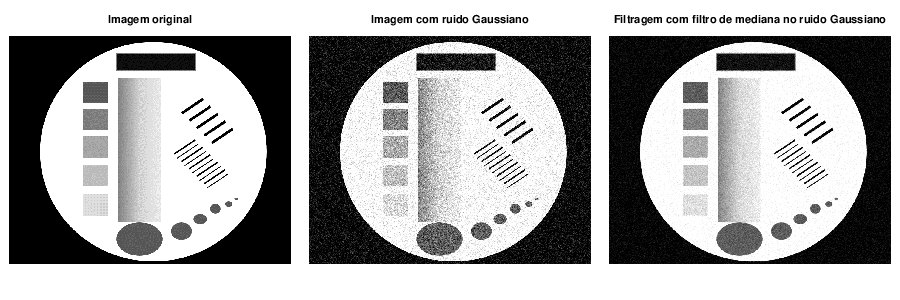

In [57]:
tripleImages(img, simulada_gaussianNoise, simulada_gaussianNoise_median, ...
            'Imagem com ruido Gaussiano', ...
            'Filtragem com filtro de mediana no ruido Gaussiano');

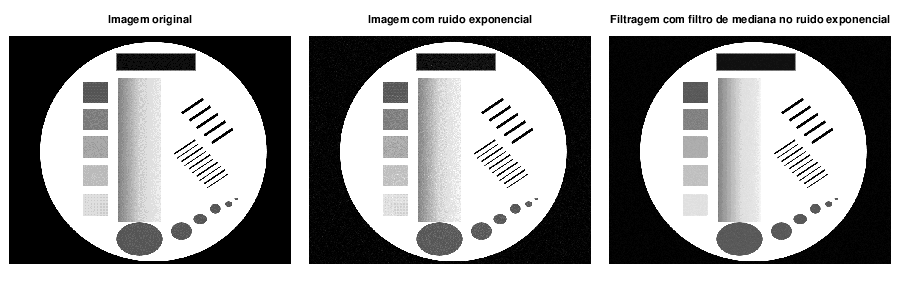

In [58]:
tripleImages(img, simulada_exponencialNoise, simulada_exponencialNoise_median, ...
            'Imagem com ruido exponencial', ...
            'Filtragem com filtro de mediana no ruido exponencial');

Como esperado do filtro de mediana, este foi o que lidou melhor o ruído sal e pimenta, resultando em uma imagem filtrada até melhor que a original. Seu desempenho também foi excelente para o ruído exponencial. No caso do ruído Gaussiano a performance começou a diminuir e não conseguiu eliminar completamente o ruído, ainda persistindo aqueles de maiores frequências.

O pior desempenho desse filtro foi em relação ao ruído branco que quase não surtiu efeito para eliminar o ruído, permanecendo, ainda, uma imagem altamente contaminada.

## Filtro no domínio do espaço vs. domínio da frequência

As imagens utilizadas para essa seção serão diferentes.